## Random walk, gambler's ruin problem (python version)

Formula for analytic solution, if the starting point is at zero:

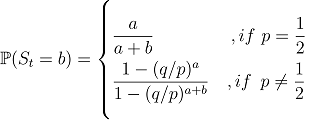

$-a=$ Lower boundary

$b=$ Upper boundary

$p=$ The probability the gambler wins a game

$q=1-p=$ The probability that the gambler loses a game

If the starting point is not zero, one has to shift all values (starting point, upper boundary, lower boundary) by the same amount so that the starting point is at zero.

Illustration:

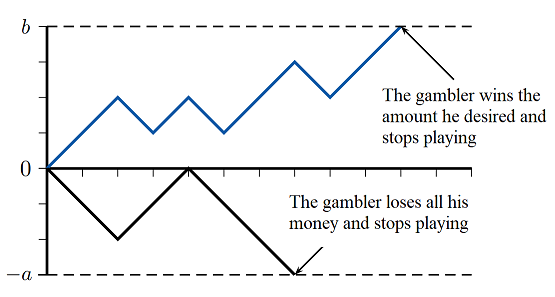

Source of formula and illustration:

Henze, Norbert. *Irrfahrten – Faszination Der Random Walks*. 2. Aufl. 2018 ed. Wiesbaden: Springer Fachmedien Wiesbaden.

(The illustration was slightly modified)


In [ ]:
import random
import time
import numpy as np
import matplotlib.pyplot as plt

start = time.time()

num_trials = 1000                     # Numer of trials
y_lower_hits = 0                      # The number of times the random walk hits the lower boundary first
y_upper_hits = 0                      # The number of times the random walk hits the upper boundary first
x_lower_hits = 0                      # The number of steps it takes to hit the lower boundary first (cumulative)
x_upper_hits = 0                      # The number of steps it takes to hit the upper boundary first (cumulative)

x = 0                                 # x-coordinate of the starting point
y = 0                                 # y-coordinate of the starting point
x_step_size = 1                       # step size (x)
y_step_size = 1                       # step size (y)

upper_bound = 100                     # Upper bound
lower_bound = -50                     # Lower bound

x_list = []                           # Lists for graphing a path
y_list = []

for i in range(num_trials):           # First loop
  counter = 0                         # Initializing the counter which holds the number of steps to the lower or upper boundary
  x_1 = x                             # Initializing the x-coordinate of the starting point at the beginning of the next loop  
  y_1 = y                             # Initializing the x-coordinate of the starting point at the beginning of the next loop  
  
  while True:                                       # Second loop
    counter = counter + x_step_size                 # Counter for keeping track of the number of steps in each loop
    rand = random.random()                          # Random number in the interval [0, 1)
    x_1 = x_1 + x_step_size

    if rand <= 0.5:                                 # Condition: if the generated random number is in the inteval [0, 0.5), move y up by the step size
      y_1 = y_1 + y_step_size
      
      if y_1 == upper_bound:                        # If y has reached the upper boundary, make a record of it, and of the number of steps it took, and break the second loop
        y_upper_hits = y_upper_hits + 1
        x_upper_hits = x_upper_hits + counter
        break 
    
    if rand > 0.5:                                  # Condition: if the generated random number is in the inteval [0.5, 1), move y down by the step size
      y_1 = y_1 - y_step_size
      
      if y_1 == lower_bound:                        # If y has reached the lower boundary, make a record of it, and of the number of steps it took, and break the second loop
        y_lower_hits = y_lower_hits + 1
        x_lower_hits = x_lower_hits + counter
        break
    
    if i == 1:
      x_list.append(x_1)
      y_list.append(y_1)


plt.figure(figsize=(10,6))                                     # Graphing path
plt.plot(x_list, y_list)                                     
plt.axhline(y = upper_bound, color="red", linestyle="--")
plt.text(100, upper_bound, 'Upper boundary', fontsize=8, va='center', ha='center', backgroundcolor='w')
plt.axhline(y = lower_bound, color="red", linestyle="--")
plt.text(100, lower_bound, 'Lower boundary', fontsize=8, va='center', ha='center', backgroundcolor='w')
plt.ylabel('Values')
plt.xlabel('Steps')
plt.title('A random walk')
plt.show()
      
end = time.time()

print(f'The probability that the line hits {lower_bound} first: ', y_lower_hits/num_trials)
print(f'The probability that the line hits {upper_bound} first: ', y_upper_hits/num_trials)
print(f'The line hits the upper boundary ({upper_bound}), on average, after {int(round(x_upper_hits/(y_upper_hits + 0.000000000001), 0))} steps.')    # Avoiding division by zero
print(f'The line hits the lower boundary ({lower_bound}), on average, after {int(round(x_lower_hits/(y_lower_hits + 0.000000000001), 0))} steps.')
print(f'Execution time: {end - start} seconds.')

## Random walk, cython version

Instructions: the first cell has to be run before the second one.

In [1]:
%load_ext cython

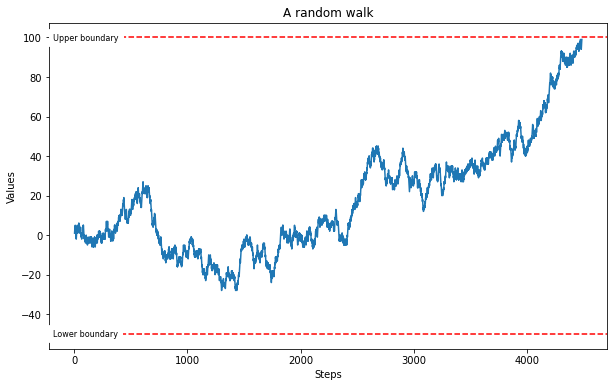

The probability that the line hits -50.0 first:  0.6779
The probability that the line hits 100.0 first:  0.3221
The line hits the upper boundary, on average, after 6745 steps.
The line hits the lower boundary, on average, after 4080 steps.
Execution time: 21.53874135017395 seconds.


In [2]:
%%cython

import random
import time
import matplotlib.pyplot as plt


def random_walk_cython(int num_trials, float upper_bound, float lower_bound, float y_step_size, float x_step_size):

    start = time.time()
    
    cdef:

        int y_lower_hits = 0                      # The number of times the random walk hits the lower boundary first
        int y_upper_hits = 0                      # The number of times the random walk hits the upper boundary first
        int x_lower_hits = 0                      # The number of steps it takes to hit the lower boundary first (cumulative)
        int x_upper_hits = 0                      # The number of steps it takes to hit the upper boundary first (cumulative)
        int x = 0
        int y = 0
        


        x_list = []                                     # Lists for graphing a path
        y_list = []
        
    for i in range(num_trials):                         # First loop
      counter = 0                                       # Initializing the counter which holds the number of steps to the lower or upper boundary
    
      x_1 = 0                                           # Initializing the x-coordinate of the starting point at the beginning of the next loop  
      y_1 = 0                                           # Initializing the x-coordinate of the starting point at the beginning of the next loop  
      
      while True:                                       # Second loop
        counter = counter + x_step_size                 # Counter for keeping track of the number of steps in each loop
        rand = random.random()                          # Random number in the interval [0, 1)
        x_1 = x_1 + x_step_size

        if rand <= 0.5:                                 # Condition: if the generated random number is in the inteval [0, 0.5), move y up by the step size
          y_1 = y_1 + y_step_size
          
          if y_1 == upper_bound:                        # If y has reached the upper boundary, make a record of it, and of the number of steps it took, and break the second loop
            y_upper_hits = y_upper_hits + 1
            x_upper_hits = x_upper_hits + counter
            break 
        
        if rand > 0.5:                                  # Condition: if the generated random number is in the inteval [0.5, 1), move y down by the step size
          y_1 = y_1 - y_step_size
          
          if y_1 == lower_bound:                        # If y has reached the lower boundary, make a record of it, and of the number of steps it took, and break the second loop
            y_lower_hits = y_lower_hits + 1
            x_lower_hits = x_lower_hits + counter
            break
        
        if i == 1:
          x_list.append(x_1)
          y_list.append(y_1)


    plt.figure(figsize=(10,6))                           # Graphing path
    plt.plot(x_list, y_list)                                     
    plt.axhline(y = upper_bound, color="red", linestyle="--")
    plt.text(100, upper_bound, 'Upper boundary', fontsize=8, va='center', ha='center', backgroundcolor='w')
    plt.axhline(y = lower_bound, color="red", linestyle="--")
    plt.text(100, lower_bound, 'Lower boundary', fontsize=8, va='center', ha='center', backgroundcolor='w')
    plt.ylabel('Values')
    plt.xlabel('Steps')
    plt.title('A random walk')
    plt.show()

    end = time.time()

    return [lower_bound, upper_bound, y_lower_hits/num_trials, y_upper_hits/num_trials, end - start, int(round(x_upper_hits/(y_upper_hits + 0.000000000001))), 
            int(round(x_lower_hits/(y_lower_hits + 0.000000000001)))]
  
result = random_walk_cython(10000, 100, -50, 1, 1)

print(f'The probability that the line hits {result[0]} first: ', result[2])
print(f'The probability that the line hits {result[1]} first: ', result[3])
print(f'The line hits the upper boundary, on average, after {result[5]} steps.') 
print(f'The line hits the lower boundary, on average, after {result[6]} steps.')
print(f'Execution time: {result[4]} seconds.')